In [1]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['flower_id'] = iris.target
df['flower_name'] = df['flower_id'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_id,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


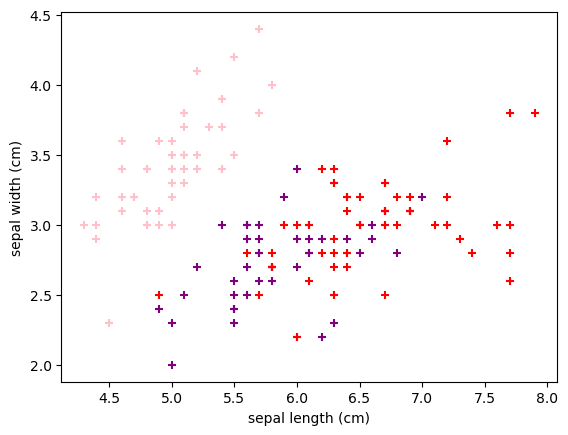

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

colors = ['pink', 'purple', 'red']

for i in range(len(colors)):
    x = df[df.flower_id == i]['sepal length (cm)']
    y = df[df.flower_id == i]['sepal width (cm)']
    plt.scatter(x, y, color=colors[i], marker='+')

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['flower_id', 'flower_name'], axis='columns'), df['flower_id'], train_size=0.8)

In [32]:
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [33]:
model.score(X_test, y_test)

0.9666666666666667

In [34]:
y_predicted = model.predict(X_test)

Text(95.72222222222221, 0.5, 'Truth')

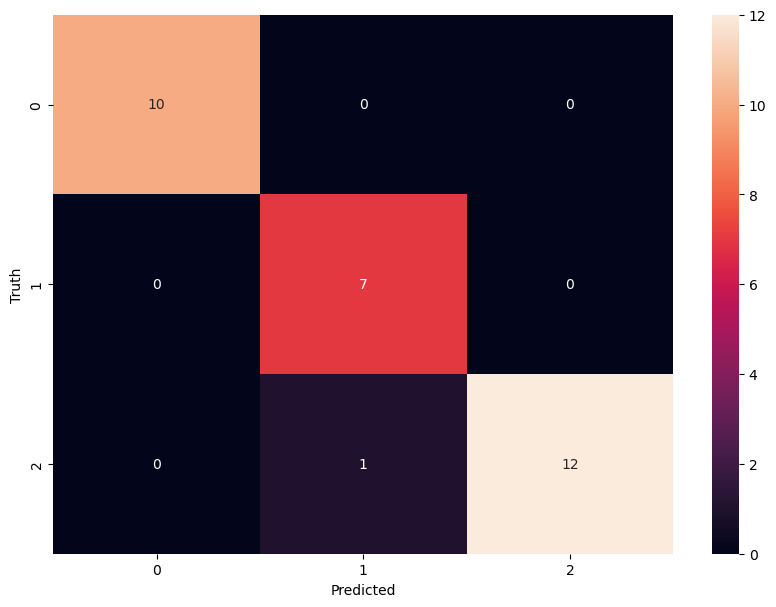

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')